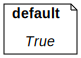

In [24]:
import pandas as pd
from hamilton.function_modifiers import config, extract_columns


@extract_columns("spend", "signups")
@config.when(default="True")
def default_data() -> pd.DataFrame:
    return pd.DataFrame(
        {
            "signups": pd.Series([1, 10, 50, 100, 200, 400]),
            "spend": pd.Series([10, 10, 20, 40, 40, 50]),
        }
    )


def avg_3wk_spend(spend: pd.Series) -> pd.Series:
    """Rolling 3 week average spend."""
    return spend.rolling(3).mean()


def spend_per_signup(spend: pd.Series, signups: pd.Series) -> pd.Series:
    """The cost per signup in relation to spend."""
    return spend / signups


def spend_mean(spend: pd.Series) -> float:
    """Shows function creating a scalar. In this case it computes the mean of the entire column."""
    return spend.mean()


def spend_zero_mean(spend: pd.Series, spend_mean: float) -> pd.Series:
    """Shows function that takes a scalar. In this case to zero mean spend."""
    return spend - spend_mean


def spend_std_dev(spend: pd.Series) -> float:
    """Function that computes the standard deviation of the spend column."""
    return spend.std()


def spend_zero_mean_unit_variance(spend_zero_mean: pd.Series, spend_std_dev: float) -> pd.Series:
    """Function showing one way to make spend have zero mean and unit variance."""
    return spend_zero_mean / spend_std_dev



from hamilton import base, driver

dr = driver.Driver(
    {"default": "True"},
   # hello_world,
    adapter=base.DefaultAdapter(),
)
# create the DAG image
dr.display_all_functions("dag", {"format": "png", "view": False})

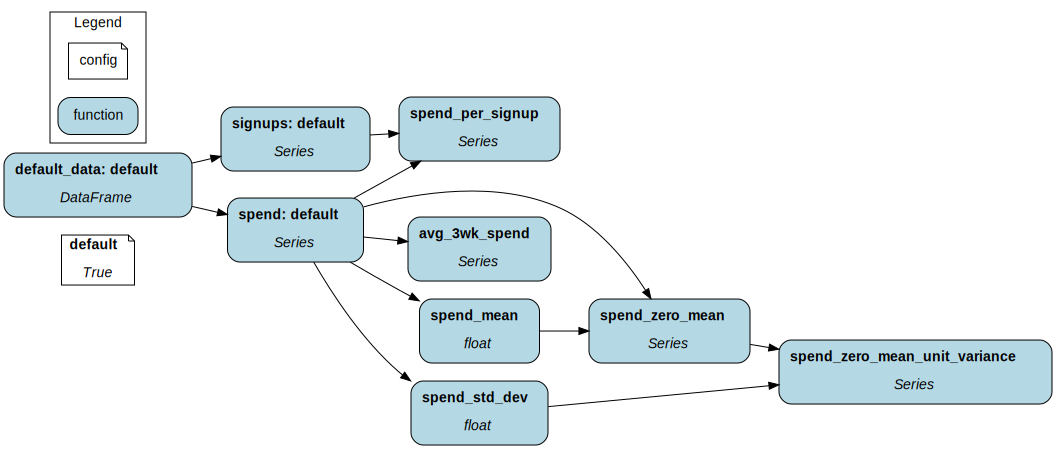

In [21]:
from hamilton import dataflows, driver
hello_world = dataflows.import_module("hello_world", "skrawcz")

dr = driver.Driver(
    {"default": "True"},
    hello_world,
    adapter=base.DefaultAdapter(),
)
# create the DAG image
dr.display_all_functions("dag", {"format": "png", "view": False})

In [29]:
from hamilton import dataflows, driver
# downloads into ~/.hamilton/dataflows and loads the module -- WARNING: ensure you know what code you're importing!
hello_world = dataflows.import_module("hello_world", "skrawcz")

# Create the driver -- passing in the functions module 
# and the right adapter for the result - in this case a Pandas DataFrame
default_df = hello_world.default_data()

dr = (
  driver.Builder()
    .with_modules(hello_world)
    .with_adapters(base.PandasDataFrameResult())
    .build()
)

# Execute the driver -- first argument is final variables
# As well as inputs (loaded above )
df = dr.execute(
  [
    "spend", 
    "signups", 
    "avg_3wk_spend", 
    "spend_per_signup", 
    "spend_zero_mean", 
    "spend_zero_mean_unit_variance"],
    inputs={"spend": default_df["spend"], "signups": default_df["signups"]},
  # uncomment the following to short circuit graph computation and override the value for spend_mean
  #, overrides={"spend_mean": 100.0}  
)
print(df.to_string())

   spend  signups  avg_3wk_spend  spend_per_signup  spend_zero_mean  spend_zero_mean_unit_variance
0     10        1            NaN            10.000       -18.333333                      -1.064405
1     10       10            NaN             1.000       -18.333333                      -1.064405
2     20       50      13.333333             0.400        -8.333333                      -0.483821
3     40      100      23.333333             0.400        11.666667                       0.677349
4     40      200      33.333333             0.200        11.666667                       0.677349
5     50      400      43.333333             0.125        21.666667                       1.257934


In [33]:
from hamilton import dataflows, driver
# downloads into ~/.hamilton/dataflows and loads the module -- WARNING: ensure you know what code you're importing!
hello_world = dataflows.import_module("hello_world", "skrawcz")

# Create the driver -- passing in the functions module 
# and the right adapter for the result - in this case a Pandas DataFrame

dr = driver.Driver(
    {"default": "True"},
    hello_world,

   # hello_world,
    adapter=base.DefaultAdapter(),
)

# Execute the driver -- first argument is final variables
# As well as inputs (loaded above )
df = dr.execute(
  [
    "spend", 
    "signups", 
    "avg_3wk_spend", 
    "spend_per_signup", 
    "spend_zero_mean", 
    "spend_zero_mean_unit_variance"],
  # uncomment the following to short circuit graph computation and override the value for spend_mean
  #, overrides={"spend_mean": 100.0}  
)
df

{'spend': 0    10
 1    10
 2    20
 3    40
 4    40
 5    50
 Name: spend, dtype: int64,
 'signups': 0      1
 1     10
 2     50
 3    100
 4    200
 5    400
 Name: signups, dtype: int64,
 'avg_3wk_spend': 0          NaN
 1          NaN
 2    13.333333
 3    23.333333
 4    33.333333
 5    43.333333
 Name: spend, dtype: float64,
 'spend_per_signup': 0    10.000
 1     1.000
 2     0.400
 3     0.400
 4     0.200
 5     0.125
 dtype: float64,
 'spend_zero_mean': 0   -18.333333
 1   -18.333333
 2    -8.333333
 3    11.666667
 4    11.666667
 5    21.666667
 Name: spend, dtype: float64,
 'spend_zero_mean_unit_variance': 0   -1.064405
 1   -1.064405
 2   -0.483821
 3    0.677349
 4    0.677349
 5    1.257934
 Name: spend, dtype: float64}

In [3]:
from hamilton import dataflows, driver
# downloads into ~/.hamilton/dataflows and loads the module -- WARNING: ensure you know what code you're importing!
hello_world = dataflows.import_module("hello_world", "skrawcz")

# Create the driver -- passing in the functions module 
# and the right adapter for the result - in this case a Pandas DataFrame
default_df = hello_world.default_data()
# Create the driver 
dr = driver.Builder().with_modules(hello_world).build()

# Display the whole graph
gr = dr.display_all_functions(
  # "graph.png", # create image if running locally
  show_legend=True,
  orient="LR",
  deduplicate_inputs=True,
)
gr  # Display the graph directly in the Jupyter Notebook
#wasm_display(gr) # helper to display graph on this page
# Save as raw SVG
svg_content = gr.pipe(format='svg').decode('utf-8')

# Wrap in HTML
html_content = f"""
<html>
  <body>
    {svg_content}
  </body>
</html>
"""

with open("graph.html", "w") as f:
    f.write(html_content)

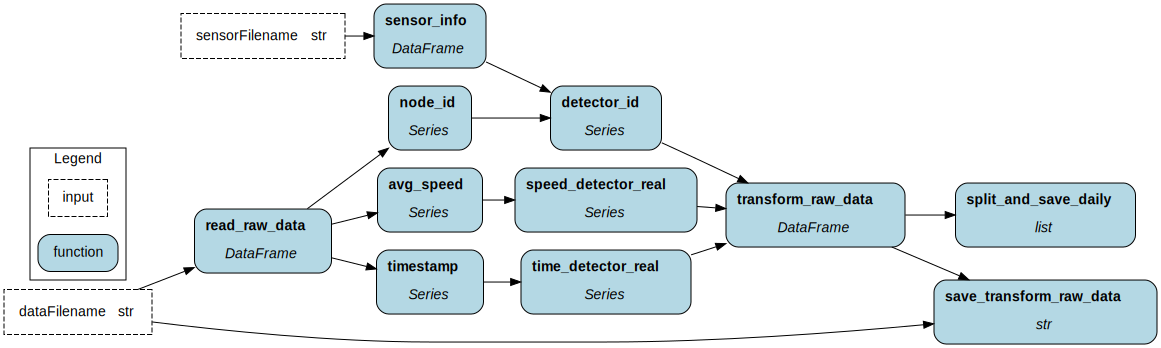

In [2]:
from hamilton import driver
import features_import_data

if __name__ == "__main__":
    config = {
        "dataFilename": "test_radar_data",  # or any other file name (without .csv)
        "sensorFilename": "sensor_info"
    }
    
    dr = driver.Builder().with_modules(features_import_data).build()

    gr = dr.display_all_functions(
    # "graph.png", # create image if running locally
    show_legend=True,
    orient="LR",
    deduplicate_inputs=True,
    )
    
    # Save as raw SVG
svg_content = gr.pipe(format='svg').decode('utf-8')

# Wrap in HTML
html_content = f"""
<html>
  <body>
    {svg_content}
  </body>
</html>
"""

with open("graph.html", "w") as f:
    f.write(html_content)

gr

   # print("Daily files saved:", results["split_and_save_daily"])
   # print("Unmapped node_ids:", results["unmapped_node_ids"])
   # print("Duration of the data:", results["duration"])

In [3]:
import os
print("Current directory:", os.getcwd())

# Replace with your target path
#os.chdir("../../")

# Confirm the current directory
print("Current directory:", os.getcwd())

Current directory: /home/kaveh/Hornsgatan/notebook
Current directory: /home/kaveh/Hornsgatan/notebook


In [7]:
import os
print("Current directory:", os.getcwd())

os.chdir("/home/kaveh/Hornsgatan/")
import importlib
from hamilton import driver, base
from src.hamilton import features_import_data

# this will reload an already imported module
importlib.reload(features_import_data)


# Confirm the current directory
print("Current directory:", os.getcwd())

# Replace with your target path
#os.chdir(".")

# Confirm the current directory
print("Current directory:", os.getcwd())

if __name__ == "__main__":
    config = {
        "dataFilename": "test_radar_data",  # or any other file name (without .csv)
        "sensorFilename": "sensor_info"
    }
    
    outputs = [
        "transform_raw_data",
        "save_transform_raw_data",
    ]
    dr = driver.Driver(config, features_import_data)
    dr = (
      driver.Builder()
        .with_config(config)  # we don't have any configuration or invariant data for this example.
        .with_modules(features_import_data)  # we need to tell hamilton where to load function definitions from
        .with_adapters(base.DictResult)  # we want a pandas dataframe as output
        .build()
    )
    results = dr.execute(outputs)
    print(results["save_transform_raw_data"])
    print(results["transform_raw_data"].head(5))

    #print("Extended data saved to:", results["timestamp_v2"])
    #print(results["transform_raw_data"])
    #print(results["transform_raw_data"].head(5))


   # print("Daily files saved:", results["split_and_save_daily"])
   # print("Unmapped node_ids:", results["unmapped_node_ids"])
   # print("Duration of the data:", results["duration"])

Current directory: /home/kaveh/Hornsgatan
Current directory: /home/kaveh/Hornsgatan
Current directory: /home/kaveh/Hornsgatan
data/transform_raw_data/test_radar_data_out.csv
  detector_id  time_detector_real  speed_detector_real
0      w2e_in          1577836782                   27
1     e2w_out          1577836785                   32
2      w2e_in          1577836785                   28
3      w2e_in          1577836787                   27
4      w2e_in          1577836788                   23


In [4]:
import logging
import sys

import pandas as pd
import os


# Replace with your target path
#os.chdir("/home/kaveh/Hornsgatan/src/hamilton/")
# We add this to speed up running things if you have a lot in your python environment.
from hamilton import registry; registry.disable_autoload()
from hamilton import driver, base
import my_functions  # we import the module here!


logger = logging.getLogger(__name__)
logging.basicConfig(stream=sys.stdout)

if __name__ == '__main__':
    # Instantiate a common spine for your pipeline
    index = pd.date_range("2022-01-01", periods=6, freq="w")
    initial_columns = {  # load from actuals or wherever -- this is our initial data we use as input.
        # Note: these do not have to be all series, they could be scalar inputs.
        'signups': pd.Series([1, 10, 50, 100, 200, 400], index=index),
        'spend': pd.Series([10, 10, 20, 40, 40, 50], index=index),
    }
    dr = (
      driver.Builder()
        .with_config({})  # we don't have any configuration or invariant data for this example.
        .with_modules(my_functions)  # we need to tell hamilton where to load function definitions from
        .with_adapters(base.PandasDataFrameResult())  # we want a pandas dataframe as output
        .build()
    )
    # we need to specify what we want in the final dataframe (these could be function pointers).
    output_columns = [
        'spend',
        'signups',
        'avg_3wk_spend',
        'acquisition_cost',
    ]
    # let's create the dataframe!
    df = dr.execute(output_columns, inputs=initial_columns)
    dr.display_all_functions("dag_2.png")  # outputs a file dag.png

    # `pip install sf-hamilton[visualization]` earlier you can also do
    #dr.visualize_execution(output_columns,'./my_dag.png', inputs=initial_columns)
    print(df)

            spend  signups  avg_3wk_spend  acquisition_cost
2022-01-02     10        1            NaN               NaN
2022-01-09     10       10            NaN               NaN
2022-01-16     20       50      13.333333          0.266667
2022-01-23     40      100      23.333333          0.233333
2022-01-30     40      200      33.333333          0.166667
2022-02-06     50      400      43.333333          0.108333


In [6]:
# my_dataflow.py
def A() -> int:
    """Constant value 35"""
    return 35

# ... more functions

# is True when calling `python my_dataflow.py`
if __name__ == "__main__":
    from hamilton import driver
    # __main__ refers to the file itself
    # and yes, a file can import itself as a module!
    import __main__

    dr = driver.Builder().with_modules(__main__).build()
    dr.display_all_functions("dag_dag.png")
    dr.execute(["A"])

In [8]:

import os

Hornsgatan_Home = "/home/kaveh/Hornsgatan/"
print("Current directory:", os.getcwd())


os.chdir(Hornsgatan_Home)


"""
# Calibration Algorithm for One Detector

This script calibrates vehicle departure times and speeds in a SUMO simulation
to match observed detector data. It iteratively adjusts each vehicle's
departure and speed until the simulated detector readings converge to the
measured values.

---

## Key Steps

1. **Load and preprocess detector data.**
2. **Initialize vehicle trips** with estimated depart times and speeds.
3. **Generate SUMO route and configuration files.**
4. **For each vehicle:**
    - Run SUMO simulation.
    - Adjust depart time and speed factor based on detector errors.
    - Repeat until convergence or max iterations.
5. **Save calibrated results.**

---

## Speed Units

- **All speeds are in meters per second (m/s).**

---

## Speed Factor

- The `speed_factor` is a multiplier applied to the vehicle’s maximum speed (`maxspeed`) in SUMO.
- The actual departure speed (`departSpeed`) is calculated as:  
  `departSpeed = speed_factor * maxspeed`
- **Range of speed factor in this algorithm:**  
  - **Minimum:** `0.9`  
  - **Maximum:** `3.0`
- **How it is updated:**
    - If the simulated speed at the detector is **too high** (`speed_error > 1`), the speed factor is **decreased** by `0.01`, but not below `0.9`.
    - If the simulated speed is **too low** (`speed_error < -0.5`), the speed factor is **increased** by `0.1`, but not above `3.0`.
- **Limitation:**  
  - SUMO may not handle `speed_factor` values less than 1.0 as expected, and very low values can cause unrealistic or unstable simulation behavior.
  - The calibration loop increases or decreases `speed_factor` to minimize the difference between simulated and real detector speeds.

---

## Iteration and Convergence Parameters

- **Maximum number of iterations per vehicle:**  
  - `iteration = 30` (configurable in the script)
- **Convergence conditions:**  
  - The calibration loop stops early if both of the following are satisfied:
    - `abs(time_error) <= 2` (the difference between simulated and real detector times is less than or equal to 2 seconds)
    - `abs(speed_error) <= 1` (the difference between simulated and real detector speeds is# Calibration Algorithm for One Detector

This script calibrates vehicle departure times and speeds in a SUMO simulation
to match observed detector data. It iteratively adjusts each vehicle's
departure and speed until the simulated detector readings converge to the
measured values.

---

## Key Steps

1. **Load and preprocess detector data.**
2. **Initialize vehicle trips** with estimated depart times and speeds.
3. **Generate SUMO route and configuration files.**
4. **For each vehicle:**
    - Run SUMO simulation.
    - Adjust depart time and speed factor based on detector errors.
    - Repeat until convergence or max iterations.
5. **Save calibrated results.**

---

## Speed Units

- **All speeds are in meters per second (m/s).**

---

## Speed Factor

- The `speed_factor` is a multiplier applied to the vehicle’s maximum speed (`maxspeed`) in SUMO.
- The actual departure speed (`departSpeed`) is calculated as:  
  `departSpeed = speed_factor * maxspeed`
- **Range of speed factor in this algorithm:**  
  - **Minimum:** `0.9`  
  - **Maximum:** `3.0`
- **How it is updated:**
    - If the simulated speed at the detector is **too high** (`speed_error > 1`), the speed factor is **decreased** by `0.01`, but not below `0.9`.
    - If the simulated speed is **too low** (`speed_error < -0.5`), the speed factor is **increased** by `0.1`, but not above `3.0`.
- **Limitation:**  
  - SUMO may not handle `speed_factor` values less than 1.0 as expected, and very low values can cause unrealistic or unstable simulation behavior.
  - The calibration loop increases or decreases `speed_factor` to minimize the difference between simulated and real detector speeds.

---

## Iteration and Convergence Parameters

- **Maximum number of iterations per vehicle:**  
  - `iteration = 30` (configurable in the script)
- **Convergence conditions:**  
  - The calibration loop stops early if both of the following are satisfied:
    - `abs(time_error) <= 2` (the difference between simulated and real detector times is less than or equal to 2 seconds)
    - `abs(speed_error) <= 1` (the difference between simulated and real detector speeds is
"""

import os
import pandas as pd
import xml.etree.ElementTree as ET
import logging
import traci
import sumolib
from math import ceil

# --- Parameters ---
date = '2020-01-01'
detector = 'w2e_in'
path = "data/calibration_internediate_data/"
pathout = "data/calibration_data/"
pathin = "data/daily_splitted_data/"
iteration = 30

if detector in ['e2w_out', 'e2w_in']:
    maxspeed = 8.33
else:
    maxspeed = 13.89


# --- Load and preprocess data ---
data = pd.read_csv(f'{pathin}data_{date}.csv')
data = data[data['detector_id'] == detector]
data.reset_index(drop=True, inplace=True)
data.reset_index(inplace=True)
data.rename(columns={"index": "id"}, inplace=True)
data["id"] = data["id"].apply(lambda x: f"{x}_{detector}")
data.sort_values(by=['unix_epoch_time'], inplace=True)
number = len(data)
df = data[["id", "detector_id", "unix_epoch_time", "avg_speed"]].head(number)
postfix = f"{detector}_{date}_{number}"

# --- Detector and route dictionaries ---
detector2lane = {
    "e2w_out": "1285834640_0",
    "e2w_in": "1285834640_1",
    "w2e_out": "151884974#0_0",
    "w2e_in": "151884974#0_1",
}
detector2laneN = {
    "e2w_out": 0,
    "e2w_in": 1,
    "w2e_out": 0,
    "w2e_in": 1,
}
detector2from = {
    "e2w_out": "24225358#0",
    "e2w_in": "24225358#0",
    "w2e_out": "151884975#0",
    "w2e_in": "151884975#0",
}
detector2to = {
    "e2w_out": "1243253622#0",
    "e2w_in": "1243253622#0",
    "w2e_out": "151884974#0",
    "w2e_in": "151884974#0",
}
detector2route = {
    "e2w_out": "24225358#0 1285834640 110107986#2 1243253630#0 98438064#0 1243253622#0",
    "e2w_in": "24225358#0 1285834640 110107986#2 1243253630#0 98438064#0 1243253622#0",
    "w2e_out": "151884975#0 1080999537#0 151884977#0 151884977#4 151884974#0",
    "w2e_in": "151884975#0 1080999537#0 151884977#0 151884977#4 151884974#0",
}

# Combine dictionaries into a DataFrame for easy access
dataframes = {
    "detector2from": pd.DataFrame.from_dict(detector2from, orient="index", columns=["from"]),
    "detector2lane": pd.DataFrame.from_dict(detector2lane, orient="index", columns=["lane"]),
    "detector2laneN": pd.DataFrame.from_dict(detector2laneN, orient="index", columns=["laneN"]),
    "detector2route": pd.DataFrame.from_dict(detector2route, orient="index", columns=["route"]),
    "detector2to": pd.DataFrame.from_dict(detector2to, orient="index", columns=["to"]),
}
combined_df = pd.concat(dataframes.values(), axis=1)

# --- Generate induction loop XML files ---
inductionLoop_filename_xml = f"{path}inductionLoop_{postfix}.xml"
inductionLoop_filename_add = f"{path}inductionLoop_{postfix}.add.xml"
instantInductionLoop_filename_xml = f"{path}instantInductionLoop_{postfix}.xml"
instantInductionLoop_filename_add = f"{path}instantInductionLoop_{postfix}.add.xml"

def write_induction_loop_files():
    # Instant induction loop
    instant_induction_loops = [
        {"id": detector, "lane": detector2lane[detector], "pos": "1", "file": instantInductionLoop_filename_xml},
    ]
    root = ET.Element("additional")
    for loop in instant_induction_loops:
        ET.SubElement(root, "instantInductionLoop", loop)
    xml_string = ET.tostring(root, encoding="unicode").replace("<additional>", "<additional>\n").replace("/>", "/>\n")
    with open(instantInductionLoop_filename_add, "w") as file:
        file.write(xml_string)

    # Standard induction loop
    induction_loops = [
        {"id": detector, "lane": detector2lane[detector], "pos": "1", "period": "1", "file": inductionLoop_filename_xml},
    ]
    root = ET.Element("additional")
    for loop in induction_loops:
        ET.SubElement(root, "inductionLoop", loop)
    xml_string = ET.tostring(root, encoding="unicode").replace("<additional>", "<additional>\n").replace("/>", "/>\n")
    with open(inductionLoop_filename_add, "w") as file:
        file.write(xml_string)

write_induction_loop_files()

# --- Initialize trips ---
def trips_initializing(df, E2S_time=28, W2S_time=51):
    trips = df.copy()
    trips['depart'] = trips['unix_epoch_time'].copy()
    trips['depart'] = trips.apply(lambda row: row["unix_epoch_time"] - E2S_time if row['detector_id'][0] == 'e' else row["unix_epoch_time"] - W2S_time, axis=1)
    trips['from'] = trips['detector_id'].apply(lambda x: "24225358#0" if x[0] == 'e' else "151884975#0")
    trips['to'] = trips['detector_id'].apply(lambda x: "1243253622#0" if x[0] == 'e' else "151884974#0")
    trips['departLane'] = trips['detector_id'].apply(lambda x: "0" if x[-1] == 't' else "1")
    trips["departSpeed"] = 0
    trips["avg_speed"] = trips["avg_speed"].apply(lambda x: x / 3.6)
    trips.sort_values(by=["depart"], inplace=True)
    return trips

trips = trips_initializing(df)
trips.to_csv(f"trips_{postfix}.csv", index=False)

# --- Generate SUMO route file ---
def route_creating(trips, routes_dict):
    def convert_row(row, routes_dict=routes_dict, departPos="0", arrivalPos="max"):
        return (
            f'\n<vehicle id="{row.id}" depart="{row.depart}" departLane="{row.departLane}" '
            f'departSpeed="{row.departSpeed}" departPos="{departPos}" arrivalPos="{arrivalPos}">'
            f'\n    <route edges="{routes_dict[row.detector_id]}"/>\n</vehicle>'
        )
    routes = trips.copy()
    text0 = '<?xml version="1.0" encoding="UTF-8"?>\n\n\n'
    text1 = '<routes xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:noNamespaceSchemaLocation="http://sumo.dlr.de/xsd/routes_file.xsd">'
    text2 = ''.join(routes.apply(convert_row, axis=1))
    text3 = '\n</routes>'
    with open(f"routes_{postfix}.xml", 'w') as myfile:
        myfile.write(text0 + text1 + text2 + text3)

route_creating(trips, combined_df["route"].to_dict())

# --- Generate SUMO configuration file ---
route_file_name = f"routes_{postfix}.xml"
trips_file_name = f"trips_{postfix}.csv"
start_time = trips["depart"].min()
network_file = "../../map/Hornsgatan_v2.net.xml"
additional_file = f"inductionLoop_{postfix}.add.xml"
additional_file_2 = f"instantInductionLoop_{postfix}.add.xml"
config_file_name = f"simulation_{postfix}.sumo.cfg"

config_content = f"""<?xml version="1.0" encoding="UTF-8"?>
<configuration xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:noNamespaceSchemaLocation="http://sumo.dlr.de/xsd/sumoConfiguration.xsd">
    <input>
        <net-file value="{network_file}"/>
        <additional-files value="{additional_file},{additional_file_2}"/>
    </input>
    <processing>
        <default.speeddev value="0"/>
    </processing>
    <time>
        <begin value="{start_time}"/>
    </time>
    <random>
        <seed value="13"/>
    </random>
    <report>
        <no-step-log value="true"/>
        <no-warnings value="true"/>
    </report>
</configuration>
"""

with open(config_file_name, "w") as config_file:
    config_file.write(config_content)

print(f"Configuration file '{config_file_name}' created successfully.")

# --- Main calibration loop ---
# To improve speed, you can comment out or remove the logging lines below.
# If you want to keep only error logs, adjust the logging level accordingly.

# Configure logging (comment out to improve speed)
logfile_name = f"{path}simulation_{postfix}.log"
logging.basicConfig(
    filename=logfile_name,
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
    datefmt="%Y-%m-%d %H:%M:%S",
)
logging.info("Simulation started.")

trips["departSpeed"] = maxspeed
trips["speed_factor"] = 1
sumo_binary = "sumo"

if traci.isLoaded():
    traci.close()
traci.start([sumo_binary, "-c", config_file_name, "--begin", str(trips["depart"][0])])#, "--threads", "1"])
traci.route.add(f"{detector}_route", combined_df.loc[detector]["route"].split())
traci.simulation.saveState(f"simulation_{postfix}_next.sumo.state")
traci.simulation.saveState(f"simulation_{postfix}.sumo.state")

#lasttrips = []
mylog = []
step = 0

for index, row in trips.iterrows():
    traci.simulation.loadState(f"simulation_{postfix}_next.sumo.state")
    traci.simulation.saveState(f"simulation_{postfix}.sumo.state")

    # Logging can be commented out for speed
    logging.info(f"Processing vehicle ID: {row['id']}")
    #logging.info(f"Initial depart: {row['depart']}, departSpeed: {row['departSpeed']}, speed_factor: {row['speed_factor']}")
    row_dict = row.to_dict()
    #logging.info(f"Row data: {row_dict}")

    step += 1
    time_error = 10
    speed_error = 10
    count = 0
    speed_factor = 1
    prow = row.copy()

    while (count < iteration) and ((abs(time_error) > 2) or abs(speed_error) > 1):
        try:
            traci.simulation.loadState(f"simulation_{postfix}.sumo.state")
        except traci.FatalTraCIError as e:
            print("Error loading simulation state:", e)
            logging.error(f"Error loading simulation state: {e}")
            traci.close()
            raise

        count += 1

        # Remove the vehicle if it exists
        if row['id'] in traci.vehicle.getIDList():
            traci.vehicle.remove(row['id'])

        # Adjust depart time for consecutive vehicles
        if len(mylog) > 0 and count == 1:
            row["depart"] = mylog[-1]["depart"] + (row["unix_epoch_time"] - mylog[-1]["time_detector_real"])

        #logging.info(f"Updated depart: {row['depart']}, departSpeed: {row['departSpeed']}, speed_factor: {row['speed_factor']}")

        try:
            traci.vehicle.addFull(
                vehID=row['id'],
                routeID=f"{row['detector_id']}_route",
                depart=row["depart"],
                departPos="0",
                departSpeed="max",    #change o to max
                departLane=row["departLane"],
            )
            traci.vehicle.setSpeedMode(row['id'], 95)
            traci.vehicle.setSpeed(row['id'], row["speed_factor"] * maxspeed)
            row["departSpeed"] = row["speed_factor"] * maxspeed
            traci.vehicle.setLaneChangeMode(row['id'], 0)
        except traci.TraCIException as e:
            print(f"Error adding vehicle {row['id']}:", e)
            logging.error(f"Error adding vehicle {row['id']}: {e}")
            traci.close()
            raise

        traci.vehicle.setSpeedFactor(row["id"], row["speed_factor"])
        #logging.info(f"start iteration in time {traci.simulation.getTime()}")

        while traci.simulation.getMinExpectedNumber() > 0:
            if traci.simulation.getTime() == int(row["depart"]) + 1:
                #logging.info(f" In time {traci.simulation.getTime()} added simulation_{postfix}_next.sumo.state")
                traci.vehicle.setSpeed(row["id"], row["departSpeed"])
                traci.vehicle.setLaneChangeMode(row["id"], 0)
                traci.simulation.saveState(f"simulation_{postfix}_next.sumo.state")
            traci.simulationStep()

            for veh_id in traci.simulation.getDepartedIDList():
                traci.vehicle.setLaneChangeMode(veh_id, 0)
            vehicles = traci.inductionloop.getLastStepVehicleIDs(detector)
            #if vehicles and vehicles[0] != row["id"] and row['id'] == "3e2w_out":
            #    logging.info(vehicles, row["id"])
            #    print(vehicles, row["id"])
            if vehicles and vehicles[0] == row["id"]:
                veh_id, veh_length, entry_time, exit_time, vType = traci.inductionloop.getVehicleData(detector)[0]
                speed = traci.inductionloop.getLastStepMeanSpeed(detector)
                time = round(entry_time - 1, 2)
                #print(f"veh_id: {veh_id} | Time: {time} s  | Speed: {speed:.2f} m/s")
                #logging.info(f"traci_time: {traci.simulation.getTime()} | veh_id: {veh_id} | Time: {time} s  | Speed: {speed:.2f} m/s")
                # Calculate the time and speed errors
                time_error = time - row["unix_epoch_time"]
                speed_error = speed - row["avg_speed"]
                #print("depart: ", row["depart"], "departSpeed: ",
                #      row["departSpeed"], "speed_factor: ", row["speed_factor"], "time_error : ", time_error,
                #      "speed_error : ", speed_error)
                #logging.info(f"depart: {row['depart']}, departSpeed: {row['departSpeed']}, speed_factor: {row['speed_factor']}, time_error: {time_error}, speed_error: {speed_error}")

                prow = row.copy()
                row["depart"] = row["depart"] - (time - row["unix_epoch_time"])
                if len(mylog) > 0 and row["depart"] <= mylog[-1]["depart"]:
                    row["depart"] = mylog[-1]["depart"] + 1

                if speed_error > 0 and speed_error > 1:
                    row["speed_factor"] = max(.9, row["speed_factor"] - 0.01)
                if speed_error <= 0 and speed_error < -.5:
                    row["speed_factor"] = min(3, row["speed_factor"] + 0.1)

                row["departSpeed"] = maxspeed
                if row['speed_factor'] < 1:
                    row["departSpeed"] = maxspeed * row["speed_factor"]
                if row['speed_factor'] > 1:
                    row["departSpeed"] = maxspeed * row["speed_factor"]

                #print("next depart: ", row["depart"], "next SPEED factor: ", row["speed_factor"])
                #logging.info(f"next depart: {row['depart']}, next SPEED factor: {row['speed_factor']}")
                break

    # Save the calibrated values back to the DataFrame
    #lasttrips.append(row)
    mylog.append({
        "veh_id": prow["id"],
        "time_detector_sim": time,
        "speed_detector_sim": speed,
        "speed_factor": prow["speed_factor"],
        "time_detector_real": prow["unix_epoch_time"],
        "depart": prow["depart"],
        "departSpeed": prow["departSpeed"],
        "speed_detector_real": prow["avg_speed"]
    })

if traci.isLoaded():
    traci.close()

# --- Save results ---
#df = pd.DataFrame(lasttrips)
#df.to_csv(f"{path}calibrated_trips_{postfix}.csv", index=False)

log_df = pd.DataFrame(mylog)
log_df["delta_time"] = log_df["time_detector_sim"] - log_df["time_detector_real"]
log_df["delta_speed"] = log_df["speed_detector_sim"] - log_df["speed_detector_real"]
log_df.to_csv(f"{path}log_{postfix}.csv", index=False)

#print("Calibration complete. Results saved.")

# --- Note on Logging ---
# To improve running speed, you may comment out or remove the logging configuration and all logging.info/logging.error calls above.
# This will reduce disk I/O and speed up the calibration loop.

Current directory: /home/kaveh/Hornsgatan


KeyError: 'unix_epoch_time'

In [9]:
data

,id,detector_id,time_detector_real,speed_detector_real,day,date
0,0_w2e_in,w2e_in,1577836811,33,Wednesday,2020-01-01
1,1_w2e_in,w2e_in,1577836814,27,Wednesday,2020-01-01
2,2_w2e_in,w2e_in,1577836815,32,Wednesday,2020-01-01
3,3_w2e_in,w2e_in,1577836826,40,Wednesday,2020-01-01
4,4_w2e_in,w2e_in,1577836847,28,Wednesday,2020-01-01
...,...,...,...,...,...,...
10157,10157_w2e_in,w2e_in,1577923177,32,Wednesday,2020-01-01
10158,10158_w2e_in,w2e_in,1577923179,25,Wednesday,2020-01-01
10159,10159_w2e_in,w2e_in,1577923181,29,Wednesday,2020-01-01
10160,10160_w2e_in,w2e_in,1577923185,36,Wednesday,2020-01-01


In [ ]:
import logging
import sys

import pandas as pd
import os
import inspect

import types

# Create a new empty module-like object
my_submodule = types.ModuleType("my_submodule")

# Replace with your target path
os.chdir("/home/kaveh/Hornsgatan/src/hamilton/")
# We add this to speed up running things if you have a lot in your python environment.
from hamilton import registry; registry.disable_autoload()
from hamilton import driver, base
from features_calib import maxspeed,number,postfix,detector_mappings,instant_induction_loop_add_file,raw_data,preprocess_data

subdag = [maxspeed,number,postfix,detector_mappings,instant_induction_loop_add_file,raw_data,preprocess_data]

subdag
my_submodule = types.ModuleType("my_submodule")

for func_name in subdag:
    setattr(my_submodule, func_name, getattr(func_name))


print(my_submodule)
dir(my_submodule)


<module 'my_submodule'>


['__doc__', '__loader__', '__name__', '__package__', '__spec__', 'maxspeed']

In [5]:
import os

os.environ['HORNSGATAN_HOME'] = '/home/kaveh/Hornsgatan'
project_path = os.environ.get("HORNSGATAN_HOME")

print(project_path)

if project_path:
    print(f"The project path is: {project_path}")
else:
    print("The PROJECT_PATH environment variable is not set.")

/home/kaveh/Hornsgatan
The project path is: /home/kaveh/Hornsgatan


In [1]:
import os

project_path = os.environ.get("HORNSGATAN_HOME")
print(project_path)

None
